In [23]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [56]:
x=np.linspace(0,4,20)
funcion = lambda x: ((-x)**(3))+(np.e**(x))-np.sin((x)*3)
y=np.array([funcion(i) for i in x])

In [57]:
class Interpolation:
    def __init__(self,datas):
        self.data = datas['data']
        self.n=datas['n']    
        
    def Vandermode(self):
        M=np.zeros((self.data[0].shape[0],self.n+1))
        
        for i in range(self.n+1):
            M[:,i]=self.data[0]**i
            
        return LA.solve(M,self.data[1])
    
    
def horner(coef, x):
    # el primer valor es igual al coeficiente mas grande
    p = coef[0]
    # comenzamos en 1 ya que el primer coeficiente se asigna antes
    # de ingresar al ciclo for
    for i in range(1,len(coef)):
        # se calcula el resto de los valores como se describe en
        # en algoritmo
        p = coef[i]+x*p
    return p

In [58]:
datas={'data':(x,y),'n':len(x)-1}
coef=np.flip(Interpolation(datas).Vandermode())

In [61]:
xp=np.linspace(0,4,30)
yp=np.array([horner(coef,i) for i in xp])
yr=np.array([funcion(i) for i in xp])

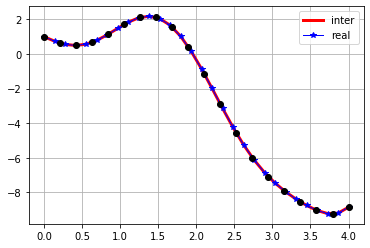

In [64]:
plt.plot(xp,yp,'red',lw=3,label='inter')
plt.plot(xp,yr,'blue',lw=1,marker='*',label='real')
for i in range(len(x)):
    plt.plot(x[i],y[i],'black',lw=2,marker='o')
    
plt.grid()
plt.legend()